
# Final Report Exercise


In [1]:
suppressPackageStartupMessages(library(knitr))
knitr::opts_chunk$set(echo = TRUE)
suppressPackageStartupMessages(library(tidyverse))
dat <- drop_na(read.csv("cces_sample_coursera.csv"))

# Problem 1

Create a vector of five numbers of your choice between 0 and 10, save that
vector to an object, and use the sum() function to calculate the sum of the
numbers.


In [2]:
# Create a vector of 5 numbers:
nums <- c(6, 9, 1, 4, 0)

# Calculate the sum of the numbers:
sum(nums)

[1] 20

# Problem 2

Create a data frame that includes two columns. One column must have the numbers
1 through 5, and the other column must have the numbers 6 through 10. The first
column must be named "alpha" and the second column must be named "beta". Name
the object "my_dat". Display the data.


In [3]:
# Create the data frame as specified:
my_dat <- as.data.frame(cbind(1:5, 6:10))
colnames(my_dat) <- c("alpha", "beta")

# Display the data frame:
my_dat

alpha,beta
<int>,<int>
1,6
2,7
3,8
4,9
5,10


# Problem 3

Using the data frame created in Problem 2, use the summary() command to create
a five-number summary for the column named "beta".


In [4]:
# Create the summary:
summary(my_dat$beta)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      6       7       8       8       9      10 

# Problem 4

There is code for importing the example survey data that will run automatically
in the setup chunk for this report. Using that data, make a boxplot of the
family income column using the base R function (not a figure drawn using
qplot). Include your name in the title for the plot. Relabel that x-axis as
"Family Income".


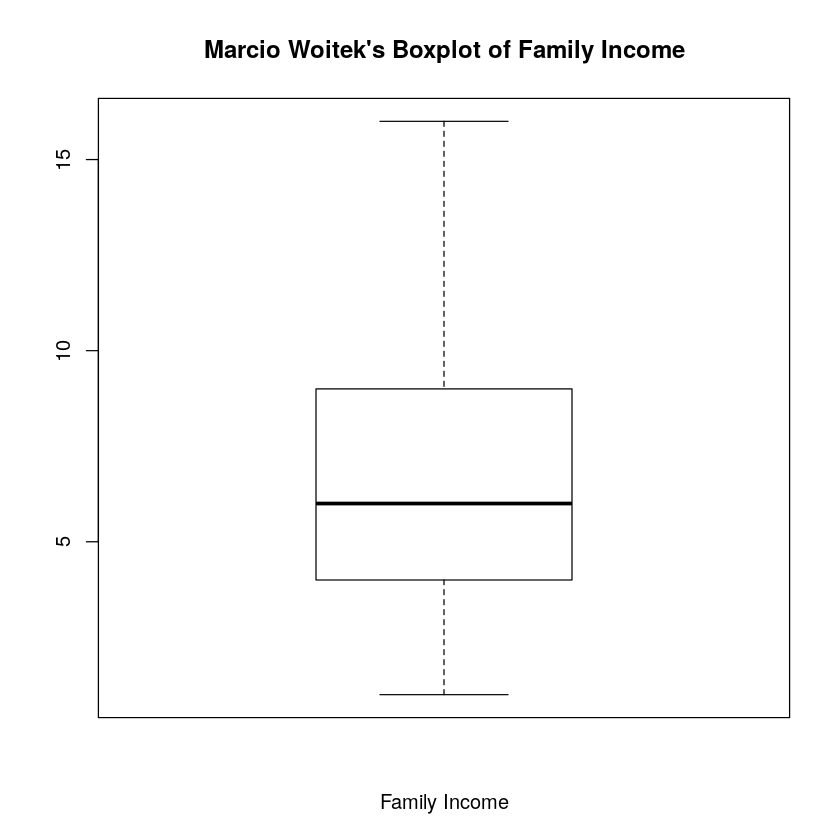

In [5]:
# Make a boxplot of the family income as specified:
boxplot(
    dat$faminc_new,
    main = "Marcio Woitek's Boxplot of Family Income", # Title
    xlab = "Family Income" # x-axis label
)

# Problem 5

Using the survey data, filter to subset the survey data so you only have male
survey respondents who live in the Northwest or Midwest of the United States,
are married, and identify as being interested in the news most of the time.

Use the str() function to provide information about the resulting dataset.


In [6]:
# Filter the survey data:
filtered_data <- dat %>% filter(
    .data[["gender"]] == 1, # Male
    .data[["marstat"]] == 1, # Married
    .data[["newsint"]] == 1, # Interested in the news most of the time
    .data[["region"]] < 3 # Live in the Northwest or Midwest
)

# Display the internal structure of filtered_data:
str(filtered_data)

'data.frame':	75 obs. of  25 variables:
 $ caseid      : int  420208067 412948037 411855595 414480371 416806180 414729651 412021973 412348831 412929385 412047867 ...
 $ region      : int  2 1 1 1 2 2 1 2 1 2 ...
 $ gender      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ educ        : int  3 5 6 5 3 2 6 5 5 5 ...
 $ edloan      : int  2 1 2 1 1 2 2 2 2 2 ...
 $ race        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hispanic    : int  2 2 2 2 2 2 2 2 2 2 ...
 $ employ      : int  1 1 1 1 1 5 5 1 1 1 ...
 $ marstat     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pid7        : int  4 1 4 4 6 2 1 1 1 7 ...
 $ ideo5       : int  5 1 3 3 3 1 2 3 1 5 ...
 $ pew_religimp: int  4 4 4 1 2 4 4 2 4 1 ...
 $ newsint     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ faminc_new  : int  10 11 10 9 10 2 13 8 7 11 ...
 $ union       : int  1 2 3 3 1 3 2 2 2 3 ...
 $ investor    : int  2 1 1 1 1 2 1 2 1 2 ...
 $ CC18_308a   : int  4 4 4 1 2 3 4 4 4 1 ...
 $ CC18_310a   : int  2 3 3 3 2 2 3 2 3 2 ...
 $ CC18_310b   : int  2 3 3 3 2 3 3 5 3 3 ...


# Problem 6

Filter the data the same as in Problem 5. Use a R function to create
a frequency table for the responses for the question asking whether these
survey respondents are invested in the stock market.


In [7]:
# Create the frequency table for the investor column of filtered_data:
table(filtered_data$investor)


 1  2 
57 18 

# Problem 7

Going back to using all rows in the dataset, create a new column in the data
using mutate that is equal to either 0, 1, or 2, to reflect whether the
respondent supports increasing the standard deduction from 12,000 to 25,000,
supports cutting the corporate income tax rate from 39 to 21 percent, or both.
Name the column "tax_scale". Display the first twenty elements of the new
column you create.


In [8]:
# Helper function:
hlpr <- function(col) { return(col %>% recode(`2` = 0L)) }

# Create the tax_scale column:
dat <- dat %>% mutate(tax_scale = hlpr(dat$CC18_325a) + hlpr(dat$CC18_325d))

# Display the first 20 elements of tax_scale:
print(dat$tax_scale[1:20])

 [1] 2 1 1 1 2 2 2 1 0 1 0 2 0 1 0 1 1 1 2 1


# Problem 8

Use a frequency table command to show how many 0s, 1s, and 2s are in the column
you created in Problem 7.


In [9]:
# Create the frequency table for the tax_scale column of dat:
table(dat$tax_scale)


  0   1   2 
130 408 331 

# Problem 9

Again using all rows in the original dataset, use summarise and group_by to
calculate the average (mean) job approval for President Trump in each of the
four regions listed in the "region" column.


In [10]:
# Calculate the average job approval for President Trump in each region:
dat %>%
    group_by(region) %>%
    summarise(Trump_Approve_Mean = round(mean(CC18_308a), digits = 2), .groups = "drop")

region,Trump_Approve_Mean
<int>,<dbl>
1,2.77
2,2.76
3,2.71
4,3.03


# Problem 10

Again start with all rows in the original dataset, use summarise() to create a
summary table for survey respondents who are not investors and who have an
annual family income of between \\$40,000 and \\$119,999 per year. The table
should have the mean, median and standard deviations for the importance of
religion column.


In [11]:
dat %>%
    # Filter the survey data:
    filter(
        .data[["faminc_new"]] > 4, # Income greater than or equal to $40,000
        .data[["faminc_new"]] < 11, # Income less than $120,000
        .data[["investor"]] == 2 # Non-investors
    ) %>%
    # Create the summary table:
    summarise(
        "Mean Religion Imp." = mean(pew_religimp),
        "Median Religion Imp." = median(pew_religimp),
        "Standard Dev. Religion Imp." = sd(pew_religimp)
    )

Mean Religion Imp.,Median Religion Imp.,Standard Dev. Religion Imp.
<dbl>,<dbl>,<dbl>
2.325893,2,1.188906


# Problem 11

Use kable() and the summarise() function to create a table with one row and
three columns that provides the mean, median, and standard deviation for the
column named "faminc_new" in the survey data.


In [12]:
# Create the summary table:
dat %>%
    summarise(
        Mean = mean(faminc_new),
        Median = median(faminc_new),
        "Std. Dev." = sd(faminc_new)
    ) %>%
    kable()



|     Mean| Median| Std. Dev.|
|--------:|------:|---------:|
| 6.581128|      6|  3.247035|

# Problem 12

With the survey data, use qplot() to make a histogram of the column named
"pid7". Change the x-axis label to "Seven Point Party ID" and the y-axis label
to "Count".


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



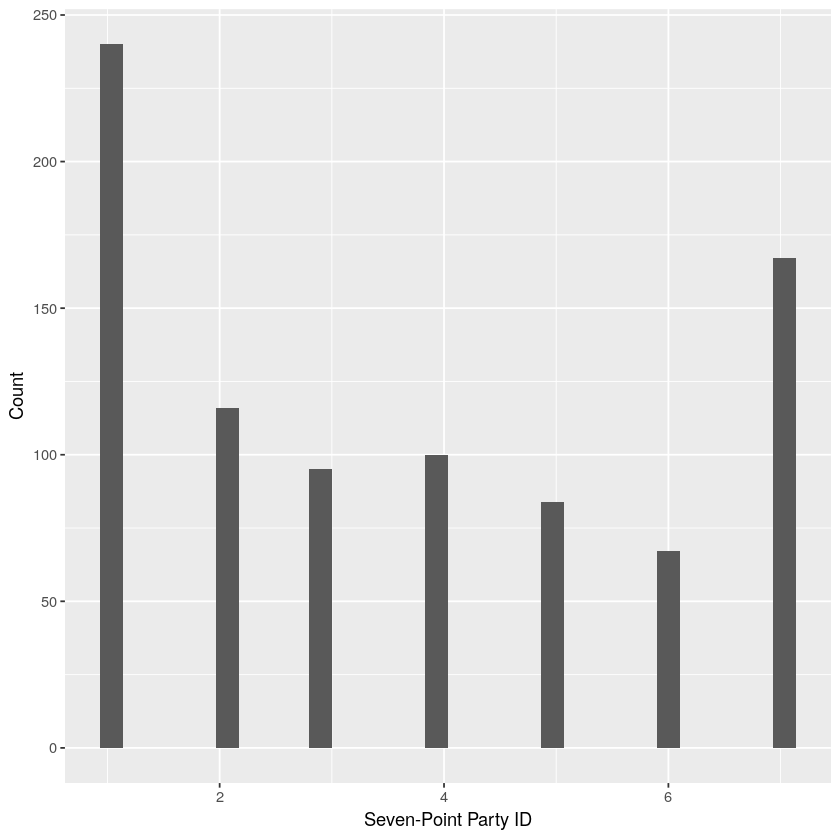

In [13]:
# Make a histogram of the pid7 column:
qplot(
    dat$pid7,
    geom = "histogram",
    xlab = "Seven-Point Party ID", # x-axis label
    ylab = "Count" # y-axis label
)